<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_5_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 5.2.3 Applying one-class support vector machine

Ronald Fisher (1936), a British statistician and biologist, published the Iris data set as an example of linear discriminant analysis. The original data set consists of 150 observations of iris flowers from three different species (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). Each observation includes four features (length and width of the sepals and petals) and the iris species.

The Iris data set is widely used for educational purposes in statistical classification techniques and pattern recognition methods, as it provides a fundamental example of a multivariate data set with quantitative attributes that can be used to demonstrate the principles of various ML algorithms.

Follow the demonstration to implement anomaly detection with one-class support vector machine (SVM) based on the Iris data set.

## Iris data set: Sepal length and sepal width

In [ ]:
# Import the necessary libraries.
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Mute warnings.
import warnings
warnings.filterwarnings('ignore')


# Load the Iris data set.
iris = load_iris()

In [ ]:
# Specify the variables.
# Only first two features for visualisation.
X = iris.data[:, :2]
y = iris.target

# Scale data for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Example usage with a pre-defined One-Class SVM model
model = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.05)
model.fit(X_scaled)

OneClassSVM(gamma=0.5, nu=0.05)

In [ ]:
# Predict the class (normal or anomaly).
y_pred = model.predict(X_scaled)
print(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [ ]:
# Create DataFrame for convenience.
df = pd.DataFrame(X_scaled, columns=iris.feature_names[:2])
df['anomaly'] = y_pred

df

,sepal length (cm),sepal width (cm),anomaly
0,-0.900681,1.019004,1
1,-1.143017,-0.131979,1
2,-1.385353,0.328414,1
3,-1.506521,0.098217,1
4,-1.021849,1.249201,1
...,...,...,...
145,1.038005,-0.131979,1
146,0.553333,-1.282963,1
147,0.795669,-0.131979,1
148,0.432165,0.788808,1


In [ ]:
# Display outliers in the DataFrame.
anomalies = df[df.anomaly == -1]

# View output.
print(anomalies.shape)
anomalies

(11, 3)


,sepal length (cm),sepal width (cm),anomaly
13,-1.870024,-0.131979,-1
15,-0.173674,3.090775,-1
22,-1.506521,1.249201,-1
32,-0.779513,2.400185,-1
41,-1.627688,-1.743357,-1
60,-1.021849,-2.433947,-1
68,0.432165,-1.973554,-1
78,0.189830,-0.362176,-1
96,-0.173674,-0.362176,-1
117,2.249683,1.709595,-1


In [ ]:
# Visualise the data
def plot_model(model, X_scaled, title):
    # Create a grid for plotting decision boundaries and anomaly detection.
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict whether each point is an inlier (1) or an outlier (-1).
    y_pred = model.predict(X_scaled)

    # Plot setup.
    plt.figure(figsize=(12, 8))
    plt.title(title)

    # Plot the decision function levels and decision boundary.
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')  # Decision boundary
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)  # Anomaly regions

    # Plot also the data points, using different markers for normals and anomalies.
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=np.where(y_pred == 1, 'Normal', 'Anomaly'),
                    style=np.where(y_pred == -1, 'Anomaly', 'Normal'), markers={'Anomaly': 'X', 'Normal': 'o'},
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'}, alpha=0.6, edgecolor='k')

    # Plot aesthetics.
    plt.axis('tight')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

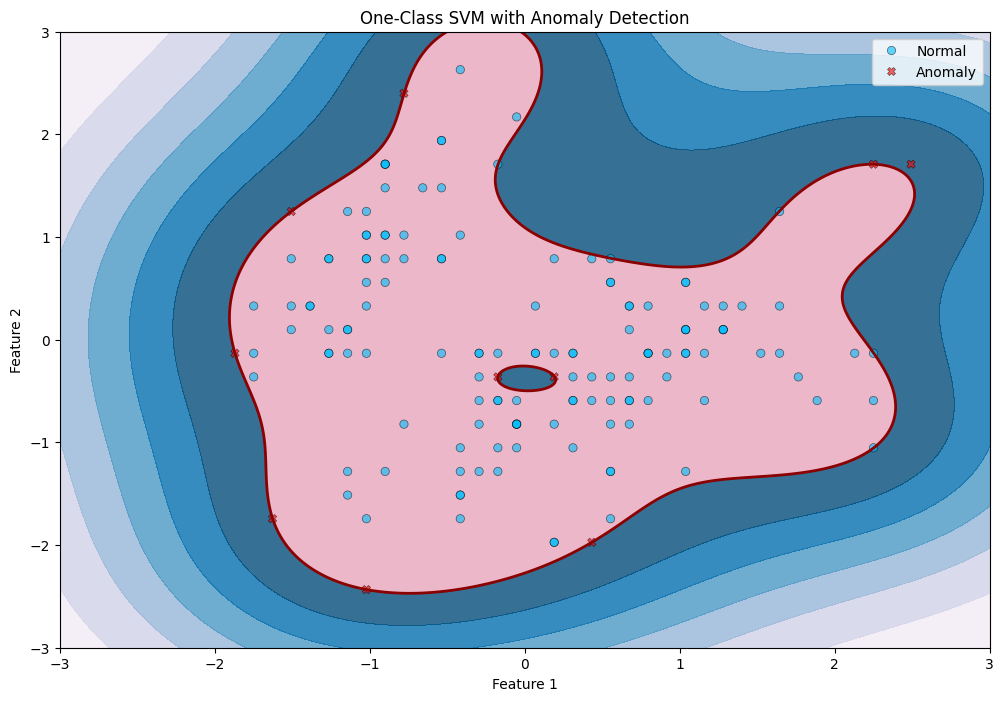

In [ ]:
# Plot the model
plot_model(model, X_scaled, "One-Class SVM with Anomaly Detection")

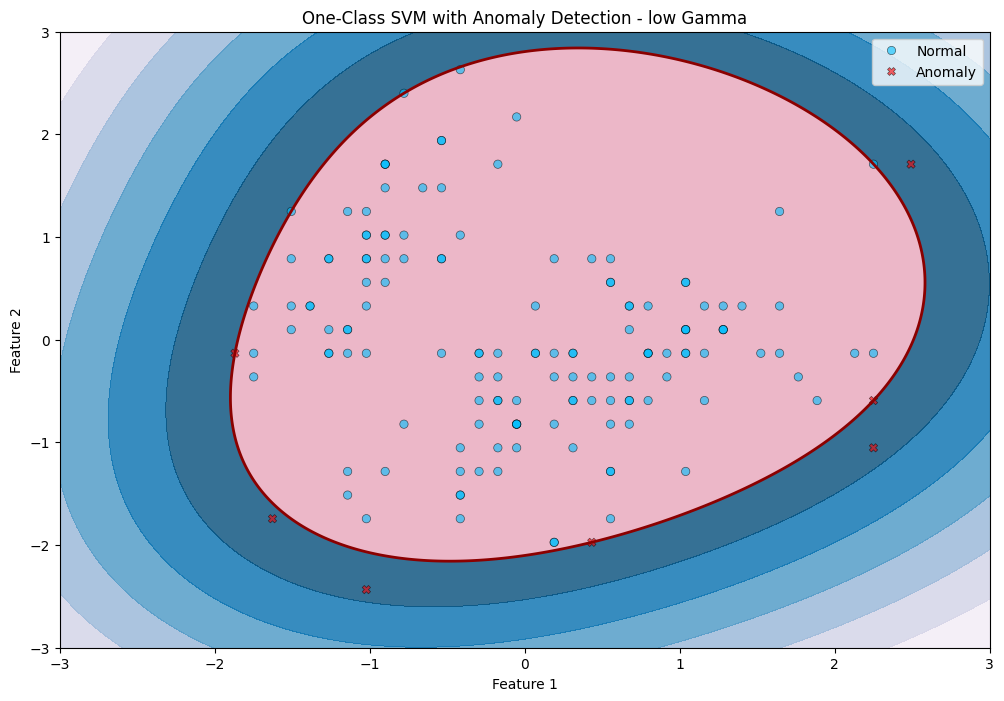

In [ ]:
# Decrease the gamma value
model_low_gamma = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
model_low_gamma.fit(X_scaled)
plot_model(model_low_gamma, X_scaled, "One-Class SVM with Anomaly Detection - low Gamma")

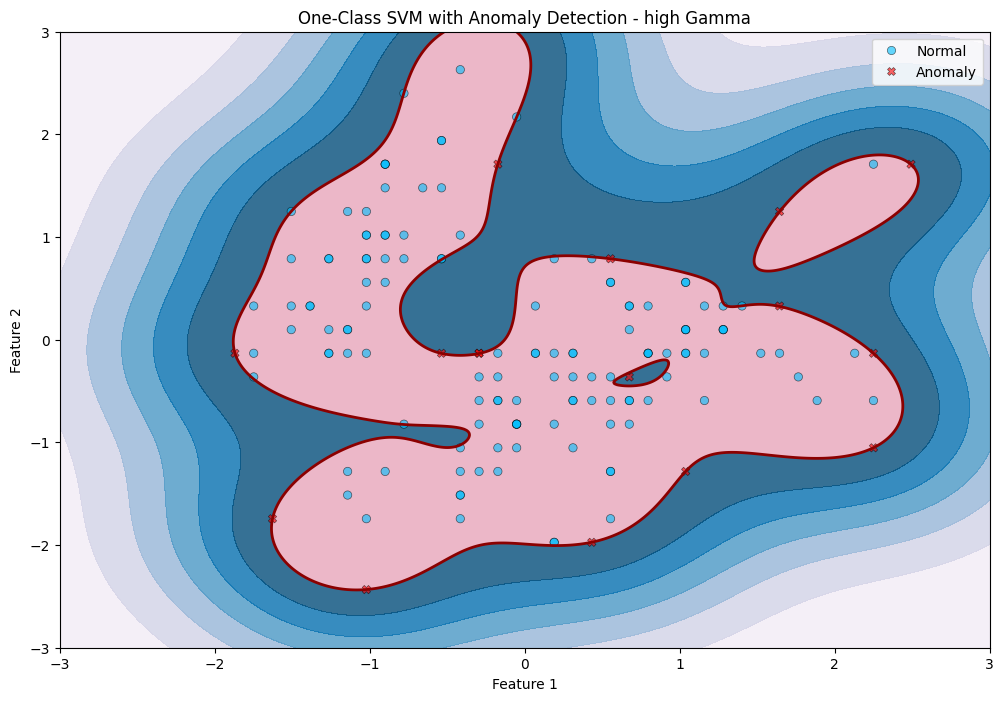

In [ ]:
# Increase the gamma value
model_high_gamma = OneClassSVM(kernel='rbf', gamma=1, nu=0.05)
model_high_gamma.fit(X_scaled)
plot_model(model_high_gamma, X_scaled, "One-Class SVM with Anomaly Detection - high Gamma")

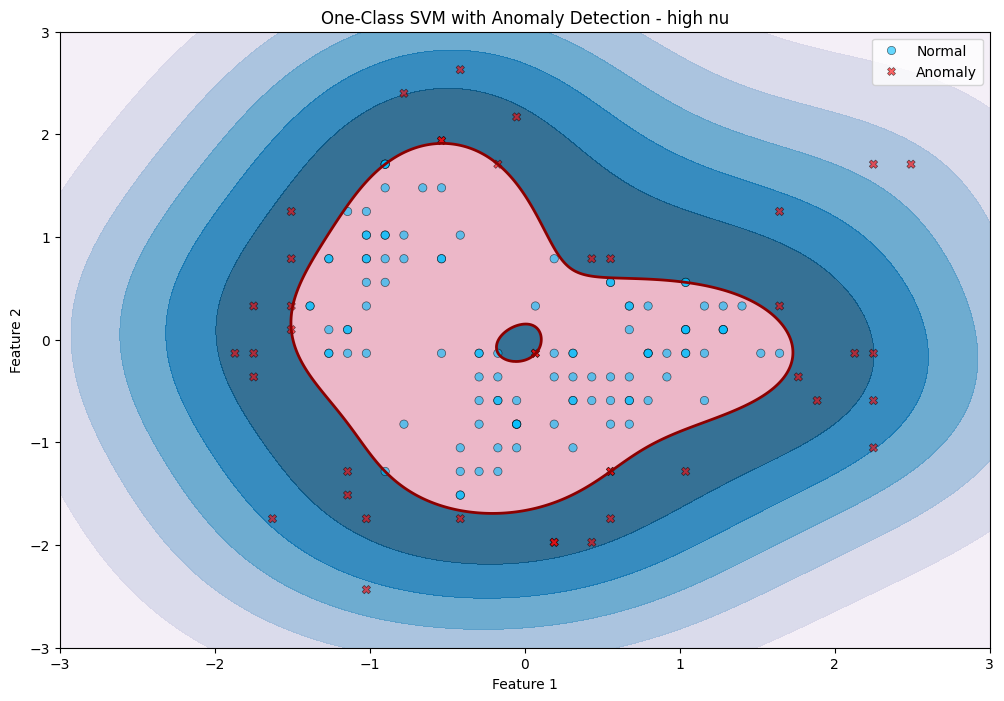

In [ ]:
# Increase the nu value.
model_high_nu = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.3)
model_high_nu.fit(X_scaled)
plot_model(model_high_nu, X_scaled, "One-Class SVM with Anomaly Detection - high nu")

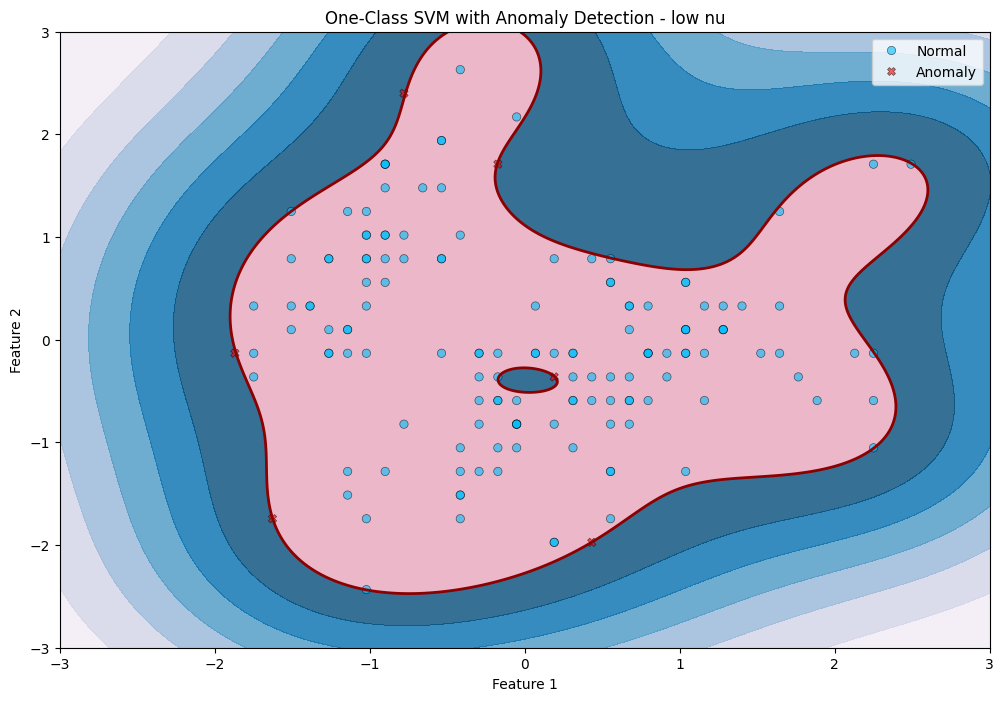

In [ ]:
# Decrease the nu value.
model_low_nu = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.01)
model_low_nu.fit(X_scaled)
plot_model(model_low_nu, X_scaled, "One-Class SVM with Anomaly Detection - low nu")

# Key information
This demonstration illustrated the importance of identifying and interpreting anomalies. You explored how to apply one-class SVM as an unsupervised ML algorith for anomaly detection.

## Reflect
What are the pracitical applications of this technique?

> Select the pen from the toolbar to add your entry.